In [1]:
from nets import q_nets
from agents import q_agent
from environments import q_playground

In [2]:
batch_size = 32

env = q_playground.ImageEnv(flatten=True)
buffer = q_agent.ExperienceReplay(batch_size)
agent = q_agent.Simple_Agent(env, buffer)

In [3]:
env_state_size = env.state_size
net_params = {
    'in_size': env_state_size,
    'n_features': [512],
    'out_size': env_state_size,
}

In [4]:
net = q_nets.Simple_QL_FC(net_params)

In [5]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

Simple_QL_FC(
  (net): Sequential(
    (0): Linear(in_features=500, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=512, out_features=500, bias=True)
  )
)

In [6]:
for i in range(batch_size):
    agent.play_step(net, 0, device)

In [7]:
batch = buffer.sample(batch_size)
states, actions, rewards, dones, next_states = batch
print(actions)

[19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19]


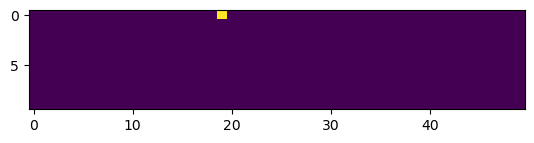

In [8]:
import matplotlib.pyplot as plt


curr_state = env.get_img_state()
plt.imshow(curr_state)